# <font color='00BFEB'> Topic Modelling Of BBC News Articles | NMF With Sklearn. </font>  <br/>
 <font color='#fd79a8'> Aim: Get only <font color='#ffdd59'>UK political theme and Goveranance News  </font>  <br> Non-Matrix Factorization<br> Unsupervised text Classification

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
bbc = pd.read_csv("..//NLP_tasks//data//bbc.csv")
bbc.head()

,article,date,panda_date,headline,summary,url
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828


In [3]:
bbc['article'][0]

'Syria war: US warns of \'more\' after missile strikes The US envoy to the UN has warned America may take further action after bombarding a Syrian air base suspected of using chemical weapons. Nikki Haley said her country would not stand by when chemical weapons were used, as it was in its "vital interest" to stop their proliferation. Syrian ally Russia accused the US of encouraging "terrorists" with its unilateral actions. Moscow has promised to strengthen its ally Syria\'s anti-aircraft defences.  It is also closing down a hotline with the US designed to avoid collisions between their air forces over Syria. At least six people are reported to have been killed in the US missile strikes early on Friday. US officials say the base was used to launch a chemical weapons attack that killed dozens of civilians on Tuesday. According to Idlib\'s opposition-run health authority, 89 people, including 33 children and 18 women, died in the suspected nerve agent attack in the rebel-held town of Kha

In [4]:
bbc['headline'][12]

"Venezuela governor 'banned from politics'"

 <font color='#fd79a8'> Result: Average number of words per headline <font color='#ffdd59'>apply-lambda  </font><br>create a column which contains number of words<br>
Use apply-lambda to create the logic needed. <br>Lambda functions consist of three parts: <br> Keyword | Bound variable/argument | Body or expression<br>


In [5]:
bbc['word_titles'] = bbc['headline'].apply(lambda x: len(x.split()))
bbc.describe()

,word_titles
count,988.000000
mean,6.167004
std,1.028196
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


### <font color='#fd79a8'>We can see that most of the headlines have around 4-6 words


Text(0.5, 1.0, 'Distribution of Number of words in the BBC News Headlines')

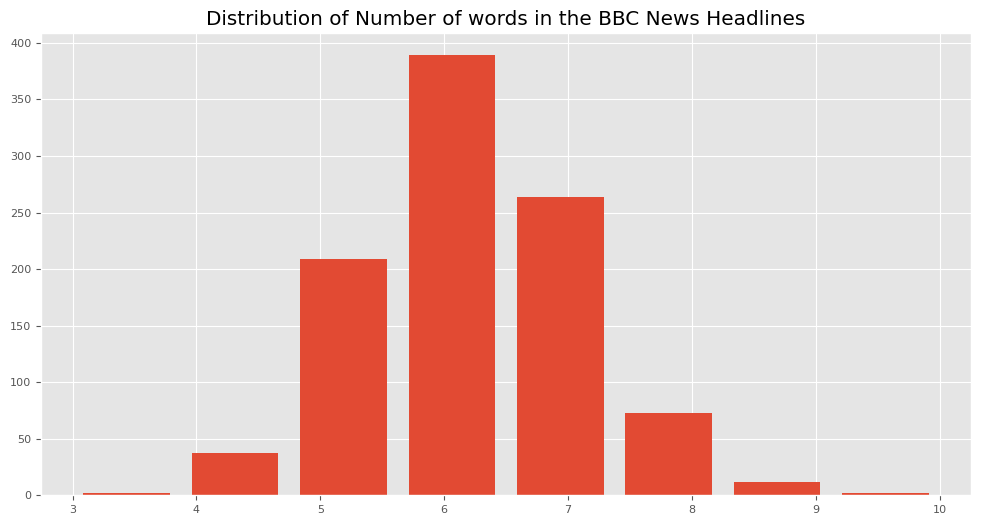

In [6]:
bbc[['word_titles']].hist(figsize=(12, 6), bins=8, xlabelsize=8, ylabelsize=8, rwidth=0.8)
plt.title('Distribution of Number of words in the BBC News Headlines')


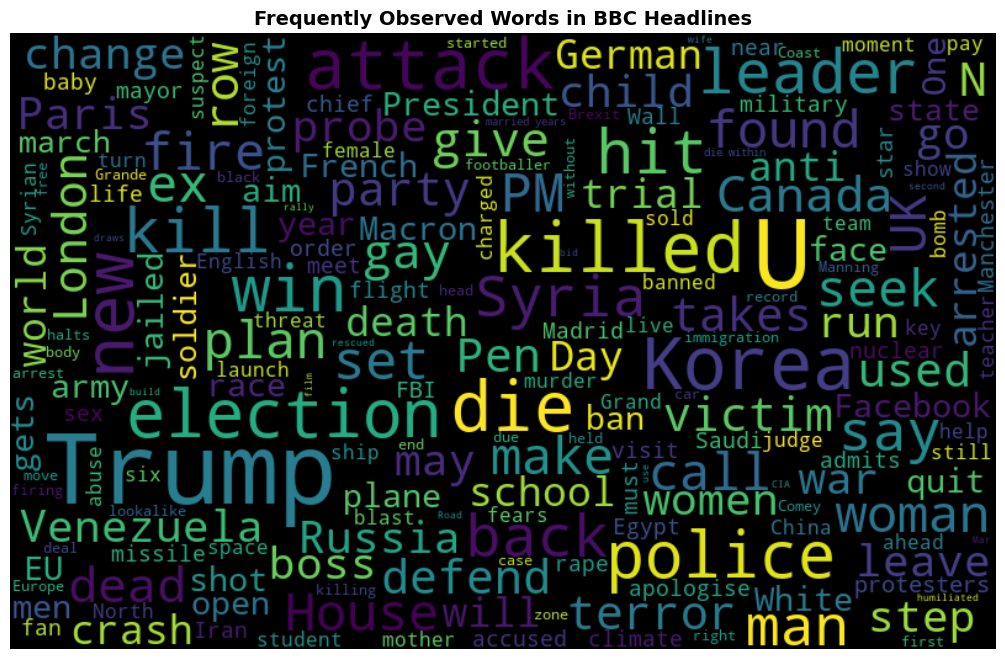

In [7]:
all_words = ''.join([word for word in bbc['headline'][0:10000]])
all_words 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=80).generate(all_words)
plt.figure(figsize=(15,8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequently Observed Words in BBC Headlines', weight='bold', fontsize=14)
plt.show()

 <font color='00BFEB'> TF-IDF is a BoW method<br> NMF can use tf-IDF. LDA can only use raw term counts for LDA as it is a probablistic graphical model. <br>min_df: float in range [0.0, 1.0] or int, default=1<br>max_df: float in range [0.0, 1.0] or int, default=1.0<br> The headlines need to be proprocessed before they can be put into DTM

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(max_df=0.95, 
                             min_df=2, 
                             stop_words='english', 
                             use_idf=True) # Enable IDF weighting

 <font color='00BFEB'> Create the DTM - document term matrix<br>basically a matrix, with documents designated by rows and words by columns<br>dtm is constructed with TFIDF scores as entries so that words that are common across all the articles are down-weighted

In [9]:
#The astype(‘U’) is telling numpy to convert the data to Unicode (essentially a string in python 3).
dtm = vectorizer.fit_transform(bbc['article'].values.astype('U'))

 <font color='00BFEB'>NumPy is used to work with arrays. The array object in NumPy is called ndarray.<br>We can create a NumPy ndarray object by using the array() function.<br>we can pass a list or array-like object into the array() method, and it will be converted into an ndarray<br>To obtain the number of items identified by the dtm function. <br>Returns a list of feature names, ordered by their indices.<br>len - number of items in an object

In [10]:
words = np.array(vectorizer.get_feature_names_out())
print(len(words))

12545


### <font color='#ffdd59'> Non-Matrix Factorization NMF  
    
    
<font color='#ffdd59'>SKLEARN is used for NMF; Next lecture - Gensim used for LDA

In [11]:
from sklearn.decomposition import NMF
import random 

 <font color='#fd79a8'>Estimate the NMF topic model on the corpus of BBC headlines. Pick the number of topics. <br>NMF components are topics<br>The first line below constructs an NMF model using the function “NMF.” The first input to the function is the number of topics which is set to “n_components=___.”<br> The second input sets the seed for random number generators so that the function will yield the same results every time it is executed

In [12]:


nmf_mod = NMF(n_components=10, random_state=42)
nmf_mod.fit(dtm)



NMF(n_components=10, random_state=42)

In [13]:
'''
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV

# Define a range of components and alpha values to search through
param_grid = {
    'n_components': [10, 15, 20],
    'alpha_W': [0.01, 0.1, 0.5, 1.0]  # Adjust these values as needed
}

# Use GridSearchCV to find the best number of components and alpha value
grid_search = GridSearchCV(NMF(random_state=42), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(dtm)

# Get the best parameters
best_params = grid_search.best_params_
best_n_components = best_params['n_components']
best_alpha_W = best_params['alpha_W']

# Use the best parameters in your NMF model
nmf_mod = NMF(n_components=best_n_components, alpha_W=best_alpha_W, random_state=42)
nmf_mod.fit(dtm)
'''

"\nfrom sklearn.decomposition import NMF\nfrom sklearn.model_selection import GridSearchCV\n\n# Define a range of components and alpha values to search through\nparam_grid = {\n    'n_components': [10, 15, 20],\n    'alpha_W': [0.01, 0.1, 0.5, 1.0]  # Adjust these values as needed\n}\n\n# Use GridSearchCV to find the best number of components and alpha value\ngrid_search = GridSearchCV(NMF(random_state=42), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')\ngrid_search.fit(dtm)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nbest_n_components = best_params['n_components']\nbest_alpha_W = best_params['alpha_W']\n\n# Use the best parameters in your NMF model\nnmf_mod = NMF(n_components=best_n_components, alpha_W=best_alpha_W, random_state=42)\nnmf_mod.fit(dtm)\n"

 <font color='#fd79a8'>verbose = 0 | an option for producing detailed logging information. You should be aware, and will probably notice if you enable verbose > 0, that printing to the screen is generally a very slow process.<br>max_iter defaults to 200 - maximum number of iterations | <br>Alpha: Constant that multiplies the regularization terms. Set it to zero to have no regularization.<br>Frobenius Norm; beta_loss is set to this as default - discuss the mathematics of Frobenius Norm later in this chapter

#### <font color='#fd79a8'>NMF gives values with the highest coefficient, not probabiltiy like with LDA

In [14]:

for index, topic in enumerate(nmf_mod.components_):
    print(f"Top 15 words for Topic#",{index})
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])

Top 15 words for Topic# {0}
['flight', 'life', 'ms', 'school', 'years', 'women', 'facebook', 'people', 'mr', 'told', 'death', 'year', 'family', 'court', 'said']
Top 15 words for Topic# {1}
['launch', 'ballistic', 'military', 'missiles', 'tests', 'test', 'kim', 'china', 'pyongyang', 'south', 'nuclear', 'korean', 'missile', 'north', 'korea']
Top 15 words for Topic# {2}
['intelligence', 'clinton', 'senate', 'director', 'flynn', 'investigation', 'russian', 'white', 'president', 'house', 'russia', 'fbi', 'trump', 'mr', 'comey']
Top 15 words for Topic# {3}
['paris', 'party', 'candidate', 'round', 'candidates', 'election', 'ms', 'emmanuel', 'marine', 'mr', 'french', 'france', 'pen', 'le', 'macron']
Top 15 words for Topic# {4}
['killed', 'civilians', 'air', 'assad', 'military', 'rebel', 'zones', 'al', 'forces', 'said', 'russia', 'attack', 'chemical', 'syrian', 'syria']
Top 15 words for Topic# {5}
['streets', 'elections', 'tear', 'assembly', 'mr', 'protesters', 'president', 'government', 'venez

 <font color='#fd79a8'>With the estimated model, we check the top 10 most likely words in each topic with .components<br>The <font color='#ffdd59'>components_</font> attribute of the estimated model is a topic-by-word matrix with each entry denoting the weight of the corresponding word in the corresponding topic. We then go through this topic-by-word matrix row by row and print out the 10 most likely words for each row. Note that the words are printed out in increasing order of their weights
    
    
 <font color='#fd79a8'>Combine topics with original data..transform() on vectorized articles to attach a label number. Latent themes are observed. 

In [15]:
bbc_topics = nmf_mod.transform(dtm)

 <font color='#fd79a8'>argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion
    
<font color='#fd79a8'>argsort - sort in ascending order


In [16]:
bbc_topics[1].argsort()

array([3, 6, 9, 1, 4, 2, 5, 8, 0, 7], dtype=int64)

In [17]:
bbc_topics[1].argmax()

7

 <font color='#fd79a8'>If we give axis=0 then it will give the index from columns and if we give axis=1 then it will give the index from rows. To find the topic index with maximum value, we can call the argmax() method and pass 1 as the value for the axis parameter.<br>

    


In [18]:
bbc_topics_labels = {0: 'Crime Victims & Public Safety',
                     1: 'Foreign Defence: North Korea',
                     2: 'US Politics',
                     3: 'Euro: French Politics',
                     4: 'International Relations: War & Conflict',
                     5: 'Venezuela', 
                     6: 'US Foreign Policy', 
                     7: 'UK Security & Terrorism', 
                     8: 'UK Politics: Brexit', 
                     9: 'Latin American Politics', 
                     10: 'Sport', 
                     11: 'Afghanistan: Extremist', 
                     12: 'Travel', 
                     13: 'Egypt', 
                     14: 'Turkey'
                     }

In [19]:
bbc['Title'] = bbc_topics.argmax(axis=1)

<font color='00BFEB'>The following script adds a new column for topic in the data frame and assigns the topic value to each row in the column:

In [20]:
bbc['topic_label'] = bbc['Title'].map(bbc_topics_labels)

In [21]:
bbc2 = bbc.groupby('Title').count()
bbc.head(15)

,article,date,panda_date,headline,summary,url,word_titles,Title,topic_label
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...,7,4,International Relations: War & Conflict
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132,7,5,Venezuela
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,0,Crime Victims & Public Safety
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828,6,6,US Foreign Policy
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117,6,8,UK Politics: Brexit
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347,7,0,Crime Victims & Public Safety
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596,6,7,UK Security & Terrorism
8,"YouTube channels need 10,000 views for adverts...",Saturday 08 April 2017,8-Apr-17,YouTube changes ad rules for new channels,YouTube video creators will now have to pass a...,http://www.bbc.com/news/technology-39527043,7,0,Crime Victims & Public Safety
9,Senate confirms Trump Supreme Court pick Neil ...,Saturday 08 April 2017,8-Apr-17,Senate confirms Trump Supreme Court pick,The party rams through a Supreme Court nominee...,http://www.bbc.com/news/world-us-canada-39532709,6,6,US Foreign Policy


In [22]:
bbc2

,article,date,panda_date,headline,summary,url,word_titles,topic_label
Title,,,,,,,,
0,385,385,385,385,385,385,385,385
1,35,35,35,35,35,35,35,35
2,57,57,57,57,57,57,57,57
3,28,28,28,28,28,28,28,28
4,108,108,108,108,108,108,108,108
5,38,38,38,38,38,38,38,38
6,123,123,123,123,123,123,123,123
7,129,129,129,129,129,129,129,129
8,70,70,70,70,70,70,70,70


In [23]:
bbc_topics = bbc.loc[bbc['Title'].isin([0,3,7,8])]
bbc_topics.head()

,article,date,panda_date,headline,summary,url,word_titles,Title,topic_label
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,0,Crime Victims & Public Safety
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117,6,8,UK Politics: Brexit
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347,7,0,Crime Victims & Public Safety
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596,6,7,UK Security & Terrorism


### <font color = "maroon"> Word Cloud

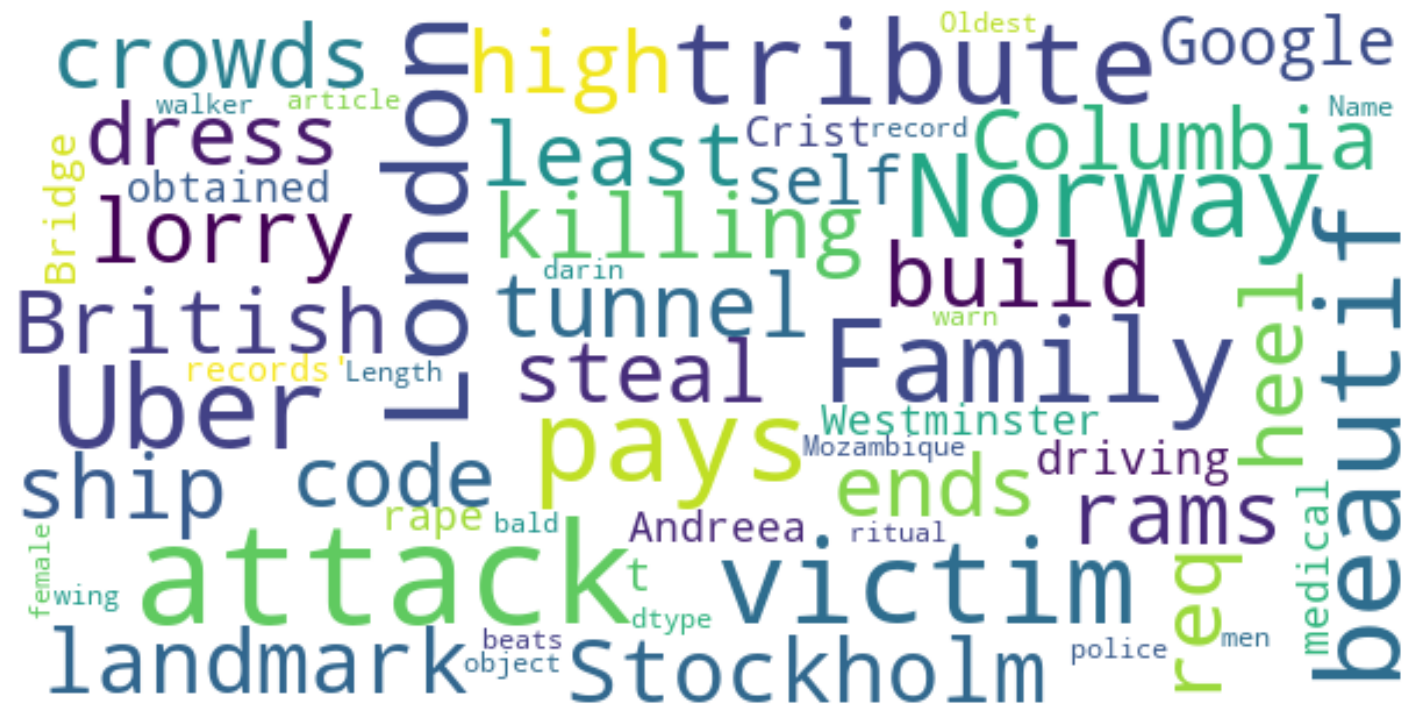

In [24]:
text = str(bbc_topics.article) 
wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600, height=300, max_font_size=60, max_words=60, background_color="white" ).generate(text)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()